# Taller 6

## Métodos Computacionales 1 2022-10

Instrucciones: Suba el jupyter notebook **.ipynb** en la actividad de bloque neon. El archivo debe ser nombrado ApellidoNombre_ApellidoNombre_Taller6.ipynb. **El archivo debe poder correr en el binder de la magistral** 

Si un ejercicio demora **más de 10 segundos** en correr se considerará **incorrecto**.

No modifique el cuaderno, ni los casos de prueba, puede correr los casos de prueba pero no modificarlos.

**Entrega: Lunes 16 de Mayo 11:59 pm**

## Librerias

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal 
from scipy.stats import norm
import Algoritmosnumericos as Alg
plt.style.use('dark_background')
%matplotlib widget
%config InlineBackend.figure_format = 'retina'
import math
from math import factorial as fac
import random

In [25]:
def hipotesis(n, μ, σ, μh, α):
    # Normalizamos por comodidad para una distribución normal estandar y hallamos el valor absoluto del estádistico de prueba
    z = abs(μh-μ)*(np.sqrt(n))*(1/σ)
    # Hecho lo  anterior hallamos la mitad de p
    p = 1-norm.cdf(z)
    # Realizamos la prueba de hipotésis
    if(2*p < α):
        print('p: ', 2*p)
        print(False)
    else:
        print('p: ', 2*p)
        print(True)

## Problema 1

Resolver los siguientes problemas con 30000 pasos de MonteCarlo. Además planteé la ecuación que resuelve el problema

a) Un examen de opción múltiple contiene 30 preguntas, cada una con cinco respuestas posibles. Supongase que el estudiante sólo adivina las respuestas. ¿Cuál es la probabilidad de que el estudiante conteste de manera correcta más de 20 preguntas? 

b) En una central teléfonica se reciben llamadas según las leyes de un proceso de Poisson, con un promedio de diez llamadas por hora, ¿Cuál es la probabilidad de que ninguna llamada sea recibida entre las 8am y las 12 del medio día?

Punto a)

Se tiene la ecuación para una distribución binomial como:
$$P(x)= \frac{n!}{x!(n-x)!} p^{x}q^{n-x}$$
Donde:
- n es es el número de muestras (n = 30)
- x es la variable aleatoria
- p es la probabilidad de exito (p = 1/5 = 0.2)
- q es la probabilidad de fracaso (q = 1 - 0.2 = 0.8)

Así, la función que se utilizará es:
$$P(x)= \frac{30!}{x!(30-x)!} 0.2^{x}0.8^{30-x}$$

Y para utilizar el método de monte carlo, se tomarán como límites desde 21 hasta 30 porque en el problema se especifica 'la probabilidad de que sea mayor a 20 el número de preguntas acertadas'

In [26]:
#Límites
LimInferior = 21
LimSuperior = 30
#Función de integración. n= 30 x = variable aleatoria p = 0.2, q = 0.8
def f(x):
    return (fac(30)/(fac(x)*fac(30 - x)))*math.pow(0.2, x)*math.pow(0.8, 30 - x)
#MonteCarlo
def MonteCarlo(LimInferior, LimSuperior, Muestras):
    suma = 0
    for i in range(Muestras):
        suma += f(int(LimInferior + (LimSuperior-LimInferior)*np.random.uniform(0,1,1)))
    return ((LimSuperior-LimInferior)/Muestras)*suma
#Solución
Dist_Binomial = MonteCarlo(LimInferior, LimSuperior, 30000)
print(f'La probabilidad de que el estudiante conteste de manera correcta más de 20 preguntas es aproximadamente {Dist_Binomial}')

La probabilidad de que el estudiante conteste de manera correcta más de 20 preguntas es aproximadamente 4.394180382920464e-09


Punto b)

Para este punto se pide la probabilidad de que en una central telefónica ninguna llamada sea recibida entre las 8 y las 12. Se hará en dos partes: la primera, por medio de montecarlo con distribución de poisson y la segunda, con la función de distribución de poisson:

$$P(x)= \frac{e^{-\lambda }\lambda ^{x}}{x!}$$

Donde:
- Lambda es el promedio por unidad de tiempo (lambda = 10 llamadas / hora), sin embargo, se tomarán cuatro horas, por tanto lambda cambia de 10 a 40 llamadas por hora.
- x es la variable aleatoria, o en este caso cero.

In [27]:
# Primera parte
dist_poisson = np.random.poisson(40, 30000)
Probabilidad = 0
for value in dist_poisson:
    if value == 0:
        Probabilidad += 1
        
Probabilidad = Probabilidad / len(dist_poisson)

print(f'La probabilidad de que entre las 8 y las 12 no se reciban llamadas, por el método 1, es de {Probabilidad}')

La probabilidad de que entre las 8 y las 12 no se reciban llamadas, por el método 1, es de 0.0


In [28]:
# Segunda parte 

lambda_pss = 40
equis = 0
probabilidad = (math.pow(math.e, - lambda_pss)*(math.pow(lambda_pss, equis)))/fac(equis)

print(f'La probabilidad de que entre las 8 y las 12 no se reciban llamadas, por el método 2, es de {probabilidad}')

La probabilidad de que entre las 8 y las 12 no se reciban llamadas, por el método 2, es de 4.248354255291598e-18


Conclusión:

Por medio del método 1 no se consigue una buena estimación de la probabilidad porque python arroja cero inmediatamente, por otro lado, el método 2 el cuál es analítico brinda una mejor probabilidad, la cual tiende a un orden de a la menos 18.

## Problema 2

Considere las dos caracteristicas "Alcohol level" y "Alcalinity level" del conjunto de datos [wine_data](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html). Pueden usar el notebook que vimos en clase la referencia es el siguiente curso. 
[Machine Learning Fundamentals UC San Diego](https://www.edx.org/es/course/machine-learning-fundamentals-2)

In [29]:
from sklearn.datasets import load_wine
import scipy.stats
alcohol_levels = load_wine()['data'][:, [0]].ravel()
alcalinity_levels = load_wine()['data'][:, [3]].ravel()

a) A partir de esas dos caracteristicas del vino, calcule el vector $\vec{\mu}$ y la matrix de covarianza $\Sigma$, 

$$
\vec{\mu} = \begin{bmatrix}
\mu_x\\
\mu_y
\end{bmatrix}, \quad \Sigma = \begin{bmatrix}
\text{Var}(x) & \text{Cov}(x, y)\\
\text{Cov}(y, x) & \text{Var}(y)
\end{bmatrix}
$$

In [30]:
## Tu codigo aqui
mu = [[np.mean(alcohol_levels),np.mean(alcalinity_levels)]]
covar = np.cov(alcohol_levels,alcalinity_levels).tolist()
print('Vector promedio:')
print('')
Alg.print_matriz(mu)
print('-----------------------')
print('')
print('Vector covarianza:')
print('')
Alg.print_matriz(covar)

Vector promedio:

[13.000618, 19.494944]
-----------------------

Vector covarianza:

[0.659062, -0.841093]
[-0.841093, 11.152686]


' '

b) A partir del la matriz de covarianza dibuje los puntos y la gaussiana bivariada, con las curvas de nivel.

El resultado se tiene que ver como lo siguiente, 

![](https://raw.githubusercontent.com/diegour1/MetodosComputacionales1/main/DataFiles/image11.png)

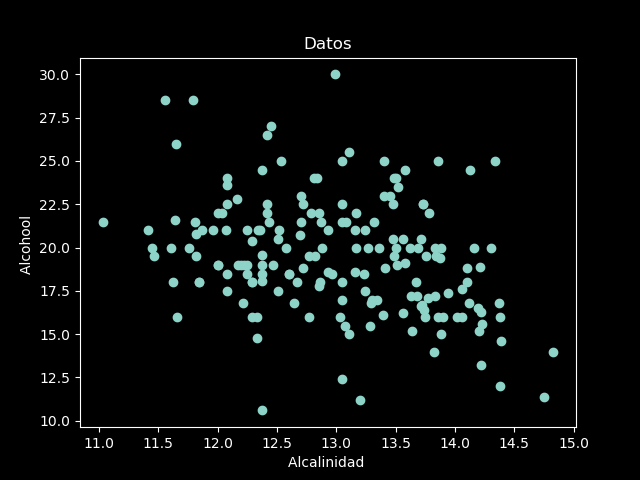

In [31]:
fig,ax=plt.subplots()
ax.scatter(alcohol_levels,alcalinity_levels)
ax.set_ylabel('Alcohool ')
ax.set_xlabel('Alcalinidad ')
ax.set_title('Datos')
plt.show()

c) Diagonalice la matriz de covarianza, es decir obtenga los valores propios y vectores propios de la matriz de covarianza

In [32]:
# Tu codigo aquí
eig_vals,eig_vecs=np.linalg.eig(covar)
print('eig vectores:')
print(' ')
print(eig_vecs)
print(100*'-')
print('eig valores:')
print(' ')
print(eig_vals)

eig_vecs=Alg.gram_schmidt(eig_vecs)
diag=np.diag(eig_vals)
print('')
print(100*'#')
print(' ')
print('Utilizando Gram SchmidhSchmidt: ')
print('')
Alg.print_matriz(eig_vecs)
print('')
print('Matriz diagonal de valores propios')
Alg.print_matriz(diag)



eig vectores:
 
[[-0.9968434   0.07939293]
 [-0.07939293 -0.9968434 ]]
----------------------------------------------------------------------------------------------------
eig valores:
 
[ 0.59207404 11.21967444]

####################################################################################################
 
Utilizando Gram SchmidhSchmidt: 

[-0.996843, 0.079393]
[-0.079393, -0.996843]

Matriz diagonal de valores propios
[0.592074, 0.0]
[0.0, 11.219674]


' '

d) A partir de los vectores propios y valores propios de la matriz, y el vector $\vec{\mu}$.

*   Desplace los datos de forma que el promedio de los datos en juntas coordenadas sea cero.
*   Rote los datos de forma que la covarianza de los datos sea cero.
*   Gráfique la gaussiana de los nuevos datos rotados con sus curvas de nivel, a partir de la diagonzalización de la matrix de covarianza original (parte c). No volver a usar la función `np.cov()` de numpy.

Una rotación de puntos en dos dimensiones se puede ver como una matriz de la forma,

$$
\text{Rot}(\theta) = \begin{bmatrix}
\cos{\theta} & -\sin{\theta}\\
\sin{\theta} & \cos{\theta}
\end{bmatrix}
$$

La gráfica se debe ver como lo siguiente,

![](https://raw.githubusercontent.com/diegour1/MetodosComputacionales1/main/DataFiles/image12.png)

La idea es expresar los datos a través de una base tal que la covarianza sea 0(y automáticamente la inversa de la covarianza sea una matriz diagonal).

Haciendo lo anterior se puede demostrar que la gráfica resultante no tendrá ''rotación asociada'' ya que:(D es la inversa de la nueva matriz de covarianza, además D es diagonal;adicionalmante $\bar{x}=(x,y)$ **expresado en la nueva base**)

$$(\bar{x}-\mu)^{T} D (\bar{x}-\mu)=ax^2+by^{2}$$

Que se cumpla lo anterior significa que la función multivariada no tendrá rotación asociada a ningún eje.


Por otro lado ya diagonalizamos la matriz $\Sigma$ por ende tenemos:

D=matriz diagonal de valores propios

A=matriz de vectores propios

$$D=A^{-1}\Sigma A=$$ como la matriz A es una matriz unitaria(Recuerde que $\Sigma$ es simétrica, por lo tanto es diagonalizable ortogonalmente o equivalentemente se puede encontrar una matriz de vectores propios A, tal que esa matriz sea unitaria) 

$$D=A^{T}\Sigma A$$

Sacando inversa a ambos lados nos queda

$$D^{-1}=D'=A^{T}\Sigma ^{-1} A$$

Por ende $\Sigma ^{-1}$ tambien es diagonalizable ortogonalmente y debido a que D es diagonal su inversa es una matriz diagonal donde sus entradas son los recíprocos de las entradas diagonales de A.

La nueva matriz de covarianza sería D', sin embargo sabemos por álgebra lineal que esta matriz de covarianza está asociada a la nueva base A, me explico:

Si vemos a la nueva varianza como una transformación lineal, notamos que esta misma está asociada como una transformación de la nueva base a la nueva base, por ende en la ecuación de la distribución multinormal debemos expresar los datos en la nueva base ortonormal.


Por ende tenemos que cambiar de base a cada punto experimental, esto se hace multiplicando cada vector de datos por $A^{-1}=A^{T}$

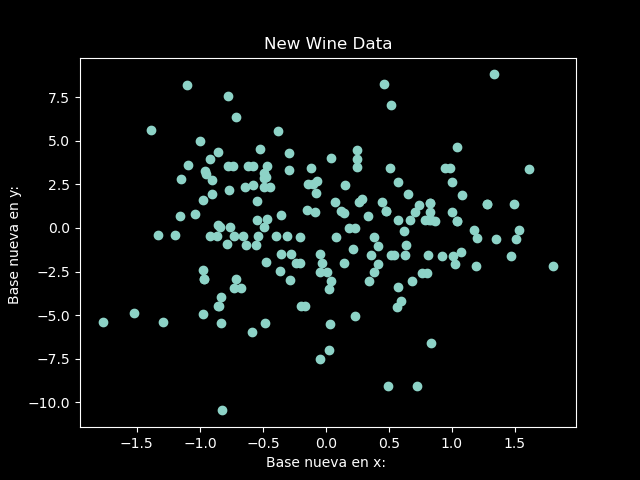

Base nueva en x es:  [-0.9968433994903422, -0.0793929272198599]
Base nueva en y es:  [0.0793929272198599, -0.9968433994903422]
Nueva covarianza: 
[1.688978, 0.0]
[0.0, 0.089129]
 
Por ende las 2 bases pueden ser interpretadas como 2 nuevas caracteristicas(Vector nueva base x)(Vector nueva base y)


In [33]:
alcohol_levels=alcohol_levels-mu[0][0]
alcalinity_levels=alcalinity_levels-mu[0][1]
def newdata(x,y):
    xnew=[]
    ynew=[]
    aux=None
    for i in range(len(x)):
        aux=Alg.producto(Alg.transpuesta(eig_vecs),[[x[i],y[i]]])
        xnew.append(aux[0][0])
        ynew.append(aux[0][1])
    return xnew,ynew

newdata=newdata(alcohol_levels,alcalinity_levels)
fig,ax=plt.subplots()
ax.scatter(newdata[0],newdata[1])
bases=Alg.transpuesta(eig_vecs)
basex=bases[0]
basey=bases[1]
ax.set_ylabel('Base nueva en y: ')
ax.set_xlabel('Base nueva en x: ')
ax.set_title('New Wine Data')
plt.show()
print('Base nueva en x es: ',basex) 
print('Base nueva en y es: ',basey)
print('Nueva covarianza: ')
Alg.print_matriz(Alg.inversa(diag))
print(' ')
print('Por ende las 2 bases pueden ser interpretadas como 2 nuevas caracteristicas(Vector nueva base x)(Vector nueva base y)')


        

Las 2 nuevas caracteristicas serían 

En la nueva x: **([0.99 alcohool, -0,079 alcalinidad])**

En la nueva y:**([0.079 alcohool, -0,99 alcalinidad])**

Nota: Las coordenadas de los nuevos datos se llaman Componentes principales, lo que hicimos fue basicamente el método PCA, el cual permite reducir la dimensionalidad de los datos, ignorando las componentes menos importantes.

## Problema 3

Un método para medir el nivel de pH de una solución resulta en una medición con un valor que está distribuido de forma normal con un promedio igual al nivel de pH y una desviación estándar de 0.05. Un ingeniero ambiental afirma que las dos soluciones vienen de la misma fuente. Si esta hipótesis fuera correcta entonces el nivel de pH de las soluciones sería igual. Para probar la veracidad de esta afirmación se realizaron 10 mediciones independientes del nivel de pH de juntas soluciones, los datos son los siguientes.

![](https://raw.githubusercontent.com/diegour1/MetodosComputacionales1/main/DataFiles/image10.png)

1.   Calcule el $p$ value, guárdelo en la variable `p_value`.
2.   Qué puede concluir con un level of significance de $\alpha = 0.05$, guarde la conclusión en el string `conclusion`

Incluya el siguiente `print` al final:

```
print(f"p value = {p_value}, la conclusion es:  {conclusion}")
```





La idea es a través de la prueba de hipótesis validar si la resta entre las 2 distribuciones tiene promedio 0. Para eso restamos A de B y estimamos los parámetros faltantes con esta información. 

De manera análoga calculcamos la desviación estandar de una resta que seria la raiz cuadrada de las sumas de las desviaciones estandar al cuadrado, como tienen la misma desviación sería $\sqrt{2}\sigma$ donde sigma es la desviación estandar

In [36]:
def hipotesis(n, μ, σ, μh, α):
    # Normalizamos por comodidad para una distribución normal estandar y hallamos el valor absoluto del estádistico de prueba
    z = abs(μh-μ)*(np.sqrt(n))*(1/σ)
    # Hecho lo  anterior hallamos la mitad de p
    p = 2*(1-norm.cdf(z))
    # Realizamos la prueba de hipotésis
    if(p < α):
        print('p: ', p)
        print(False)
    else:
        print('p: ', p)
        print(True)

In [37]:
A = [6.24, 6.31, 6.28, 6.30, 6.25, 6.26, 6.24, 6.29, 6.22, 6.28]
B = [6.27, 6.25, 6.33, 6.27, 6.24, 6.31, 6.28, 6.29, 6.34, 6.27]
C = np.array(B)-np.array(A)
n, μ, σ, μh, α = len(C), np.mean(C), np.sqrt(2)*0.05, 0, 0.05
hipotesis(n, μ, σ, μh, α)

p:  0.42082864053497304
True
